In [78]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

In [79]:
df_X=diabetes.data
df_y=diabetes.target

print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [80]:
import numpy as np

X = np.array(df_X)
y = np.array(df_y)
print(X, y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]] [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [82]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [83]:
W

array([0.57715937, 0.23446379, 0.27117799, 0.9401325 , 0.42885345,
       0.40900955, 0.46232523, 0.00844425, 0.02465335, 0.36932476])

In [84]:
b

0.9066852703871259

In [85]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [86]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [87]:
def gradient(X, W, b, y):
    N = len(W)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [88]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.58267353  -13.82971022 -189.69248999 -142.63817504  -68.36867959
  -56.11117459  127.80647937 -139.19886611 -183.01757691 -123.60222158]
db: -302.4535977850176


In [90]:
LEARNING_RATE = 0.01

In [91]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 21347.5883
Iteration 20 : Loss 15898.7768
Iteration 30 : Loss 12211.0885
Iteration 40 : Loss 9703.8887
Iteration 50 : Loss 7989.0699
Iteration 60 : Loss 6807.0926
Iteration 70 : Loss 5984.2881
Iteration 80 : Loss 5404.3528
Iteration 90 : Loss 4989.3167
Iteration 100 : Loss 4686.8354
Iteration 110 : Loss 4461.7035
Iteration 120 : Loss 4290.1857
Iteration 130 : Loss 4156.2300
Iteration 140 : Loss 4048.9367
Iteration 150 : Loss 3960.8662
Iteration 160 : Loss 3886.9069
Iteration 170 : Loss 3823.5181
Iteration 180 : Loss 3768.2216
Iteration 190 : Loss 3719.2617
Iteration 200 : Loss 3675.3760
Iteration 210 : Loss 3635.6416
Iteration 220 : Loss 3599.3711
Iteration 230 : Loss 3566.0418
Iteration 240 : Loss 3535.2483
Iteration 250 : Loss 3506.6692
Iteration 260 : Loss 3480.0449
Iteration 270 : Loss 3455.1618
Iteration 280 : Loss 3431.8409
Iteration 290 : Loss 3409.9306
Iteration 300 : Loss 3389.3004
Iteration 310 : Loss 3369.8371
Iteration 320 : Loss 3351.4417
Iteration 330 

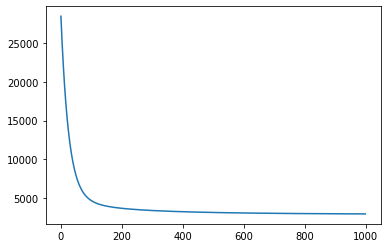

In [92]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [93]:
W, b

(array([  48.28094902, -170.16863025,  470.44820701,  306.82348072,
         -51.43546289,  -99.98064904, -210.01020252,  145.09786229,
         350.72090819,  133.01159802]),
 151.491146856271)

In [94]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2867.364518183978

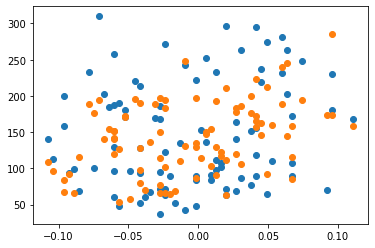

In [95]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()